# EEE-6207
## Broadband Wireless Communication
# Assignment - 1
## Name: Md. Saiful Bari Siddiqui
## Student ID : 0421062551

# Libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import least_squares
import pandas as pd

# Data

In [40]:
Pt = 10*np.log10(20)
Gt = 8
Gr = 6
PLref = -20*np.log10(300000000/(4*np.pi*2*1800000000))
Prref = Pt + Gt + Gr - PLref

# Task 1

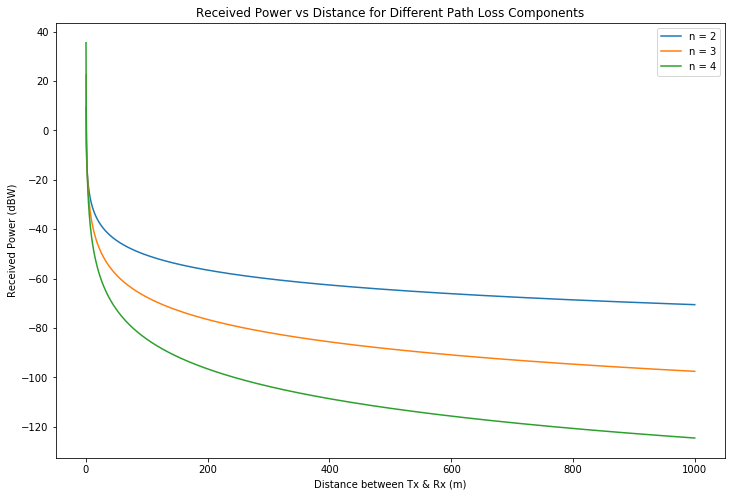

In [41]:
# Calculating Path Loss
d = np.arange(0.1,1000,0.1)
PL2 = 10*2*np.log10(d/2) # for n = 2
PL3 = 10*3*np.log10(d/2) # for n = 3
PL4 = 10*4*np.log10(d/2) # for n = 4

# Plot figure
plt.figure(figsize=(12,8))

plt.plot(d,Prref - PL2)
plt.plot(d,Prref - PL3)
plt.plot(d,Prref - PL4)

plt.legend(['n = 2','n = 3','n = 4'])
plt.title('Received Power vs Distance for Different Path Loss Components')
plt.xlabel('Distance between Tx & Rx (m)')
plt.ylabel('Received Power (dBW)')

plt.savefig('Task1.pdf')

### Comments

1. We can see, the received power keeps decreasing as the distance between Transmitter and Receiver increases. 
2. We can also see, Received power is even less when the Path loss component value is more.

# Task 2

Prob {Pr (d)		>	Threshold	}	can	be	found	from	a	normal	distribution	table	with	mean	Pr and	standard	deviation	σ.

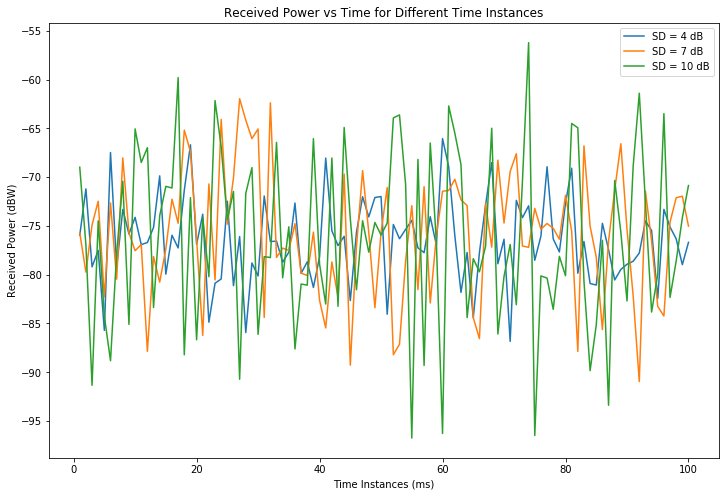

In [42]:
# Calculating Path Loss
d = 200
PL = 10*3*np.log10(d/2)
Pr = Prref - PL # without shadowing
Xsd = np.array([4,7,10])
t = np.arange(1,101,1)
Pr1 = np.random.normal(Pr,Xsd[0],100) # for SD = 4 dB
Pr2 = np.random.normal(Pr,Xsd[1],100) # for SD = 7 dB
Pr3 = np.random.normal(Pr,Xsd[2],100) # for SD = 10 dB

# Plot figure
plt.figure(figsize=(12,8))

plt.plot(t,Pr1)
plt.plot(t,Pr2)
plt.plot(t,Pr3)
plt.legend(['SD = 4 dB','SD = 7 dB','SD = 10 dB'])
plt.title('Received Power vs Time for Different Time Instances')
plt.xlabel('Time Instances (ms)')
plt.ylabel('Received Power (dBW)')

plt.savefig('Task2.pdf')

### Comments

1. This is pretty much like Task 1 at d=200m. But log normal shadowing causes Received Power to vary a bit, meaning we get different values for Pr at different time instances.
2. The values are however centered around the value of Pr without shadowing, which is somewhere around -76 dBW in this case.
3. Understandably, Received Power is varying much more when shadowing standard deviation is higher, in this case 10 dB. It varies the least when this value is lower, in this case 4 dB.

# Task 3

Prob {Pr (d) > Threshold } can be found from a normal distribution table with mean Pr and standard deviation σ.

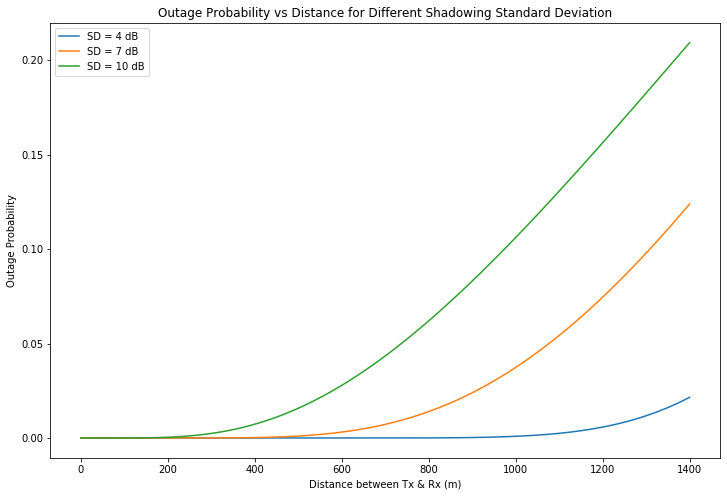

In [43]:
# Calculating Path Loss
d = np.arange(0.1,1400,0.1)
PL = 10*3*np.log10(d/2)
Pr = Prref - PL # without shadowing
Preq = -110 # -80 dBm = -110 dBW
Xsd = np.array([4,7,10])

# Calculating Probabilities
Outage_Prob4 = scipy.stats.norm(Pr, Xsd[0]).cdf(Preq) # for SD = 4 dB
Outage_Prob7 = scipy.stats.norm(Pr, Xsd[1]).cdf(Preq) # for SD = 7 dB
Outage_Prob10 = scipy.stats.norm(Pr, Xsd[2]).cdf(Preq) # for SD = 10 dB

# Plot figure
plt.figure(figsize=(12,8))

plt.plot(d,Outage_Prob4)
plt.plot(d,Outage_Prob7)
plt.plot(d,Outage_Prob10)

plt.legend(['SD = 4 dB','SD = 7 dB','SD = 10 dB'])
plt.title('Outage Probability vs Distance for Different Shadowing Standard Deviation')
plt.xlabel('Distance between Tx & Rx (m)')
plt.ylabel('Outage Probability')

plt.savefig('Task3.pdf')

### Comments

1. We can see, Outage Probability is very low when the distance between Transmitter and Receiver is low. As the distance increases, Outage Probability also starts increasing gradually after a certain distance.
2. The more the shadowing standard deviation, the more likely Outage becomes in this case. Outage Probability is very significant after some point when SD is 10 dB. Only a 6 dB difference of SD means much less chances of an Outage at SD of 4 dB.

# Task 4

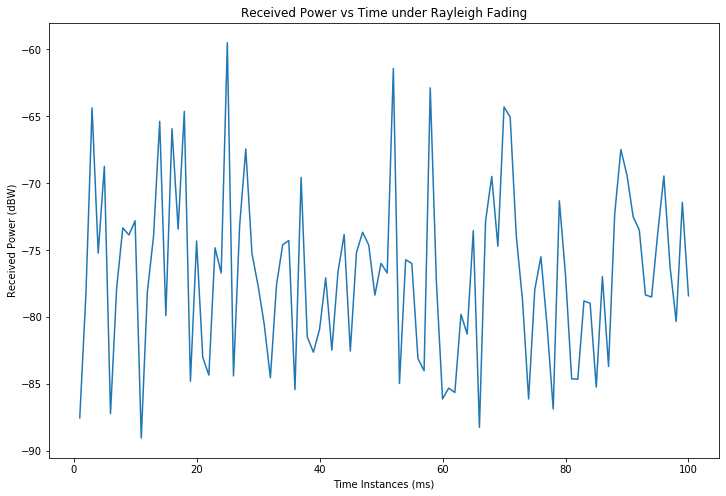

In [45]:
# Calculating Path Loss
d = 200
PL = 10*3*np.log10(d/2)
Pr = Prref - PL
t = np.arange(1,101,1)

# Adding Rayleigh Fading
Pr = np.random.rayleigh((Pr+90)*np.sqrt(2/np.pi),100) - 90

# Plot figure
plt.figure(figsize=(12,8))

plt.plot(t,Pr)
plt.title('Received Power vs Time under Rayleigh Fading')
plt.xlabel('Time Instances (ms)')
plt.ylabel('Received Power (dBW)')

plt.savefig('Task4.pdf')

### Comments

1. Received Power is averaging somewhere around -76 dBW, the value before applying Rayleigh Fading.
2. Due to Rayleigh Fading, Received Power vary a bit, meaning we get different values for Pr at different time instances.
3. Rayleigh Fading solely depends on Rayleigh distribution, not any other value or standard deviation.
4. The Mode of Rayleigh distribution is non negative. So I had to take dBnW values first to apply Rayleigh Fading, then finally converted it back to dBW.